In [ ]:
import schiller_lab_tools
import glob
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML

from scipy.cluster.vq import kmeans, whiten

[12:45:50] ERROR    PARDISO solver not installed, run `pip install pypardiso`. Otherwise,          ]8;id=224916;file:///usa/nkarthi/.conda/envs/nkarthiEnv/lib/python3.9/site-packages/openpnm/utils/_workspace.py\_workspace.py]8;;\:]8;id=69178;file:///usa/nkarthi/.conda/envs/nkarthiEnv/lib/python3.9/site-packages/openpnm/utils/_workspace.py#56\56]8;;\
                    simulations will be slow. Apple M chips not supported.                                         

# Data import

In [2]:
wd = schiller_lab_tools.read_hdf5(glob.glob("wd*.h5")[0])
od = schiller_lab_tools.read_hdf5(glob.glob("od*.h5")[0])
md, t = schiller_lab_tools.read_asc(glob.glob("md-cfg*.asc")[0])
md = md.sort_values(by = ['p_id'])
md = md.reset_index()
md = md.drop(['index'], axis = 1)
boxDims = wd.shape

# Visualization

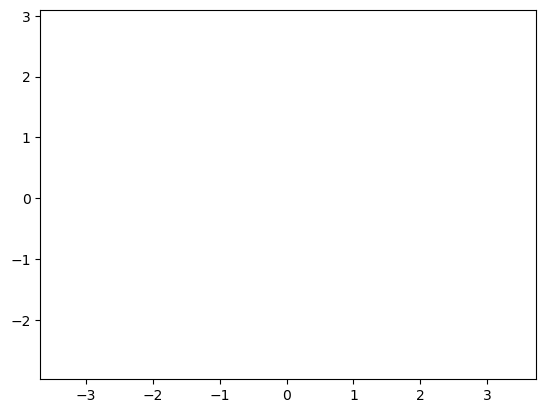

In [3]:
x = np.random.randn(32, 30)
y = np.random.randn(32, 30)

ani = schiller_lab_tools.visualization.animate_plot(x, y)
HTML(ani.to_jshtml())

In [4]:
test = np.random.randn(30, 32, 32)*10

ani = schiller_lab_tools.visualization.animate_colormap(test)
HTML(ani.to_jshtml())

# Microstructure analysis

In [5]:
phi = od - wd
phi_fill = schiller_lab_tools.microstructure_analysis.fill(phi)

In [6]:
k1 = schiller_lab_tools.microstructure_analysis.spherical_first_moment(phi_fill)
D1 = 2*np.pi/k1
D1

146.15698648260067

In [7]:
k2 = schiller_lab_tools.microstructure_analysis.second_moment(phi_fill)
D2 = 2*np.pi/np.sqrt(k2)
D2

array([67.95028804, 81.28341906, 79.23682571])

In [8]:
S_i = schiller_lab_tools.microstructure_analysis.interface_order(phi_fill)
S_i

0.10580221722429907

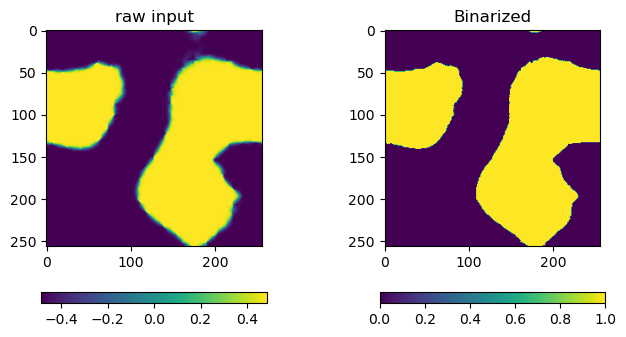

In [9]:
filter_func = lambda x: np.where(x > 0, 1, 0)

phi_bin = schiller_lab_tools.microstructure_analysis.label_regions_hk(phi_fill, filter=filter_func)

fig, axs = plt.subplots(1, 2, figsize = (8, 4))

slc = np.s_[:, boxDims[1]//2, :]

ax = axs[0]
im = ax.imshow(phi_fill[slc])
ax.set_title("raw input")
plt.colorbar(im, ax = ax, orientation = "horizontal", shrink = 0.8)

ax = axs[1]
im = ax.imshow(phi_bin[slc])
ax.set_title("Binarized")
plt.colorbar(im, ax = ax, orientation = "horizontal", shrink = 0.8)

Text(0.5, 1.0, 'Mean curvature')

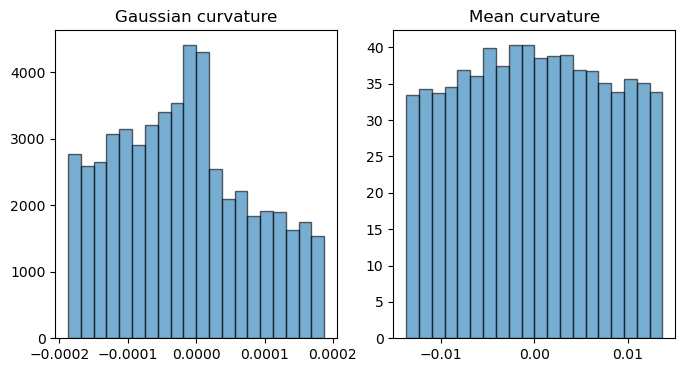

In [10]:
limit = 2/D1
K, H, A = schiller_lab_tools.microstructure_analysis.curvature(phi_fill, (limit**2, limit))

fig, axs = plt.subplots(1, 2, figsize = (8, 4))
a = 0.6
b = 20

ax = axs[0]
ax.hist(K, alpha = a, edgecolor = "k", bins = b, density = True)
ax.set_title("Gaussian curvature")

ax = axs[1]
ax.hist(H, alpha = a, edgecolor = "k", bins = b, density = True)
ax.set_title("Mean curvature")

0it [00:00, ?it/s]

0it [00:00, ?it/s]

Extracting pore and throat properties:   0%|          | 0/129 [00:00<?, ?it/s]

Text(0.5, 1.0, 'throat.inscribed_diameter')

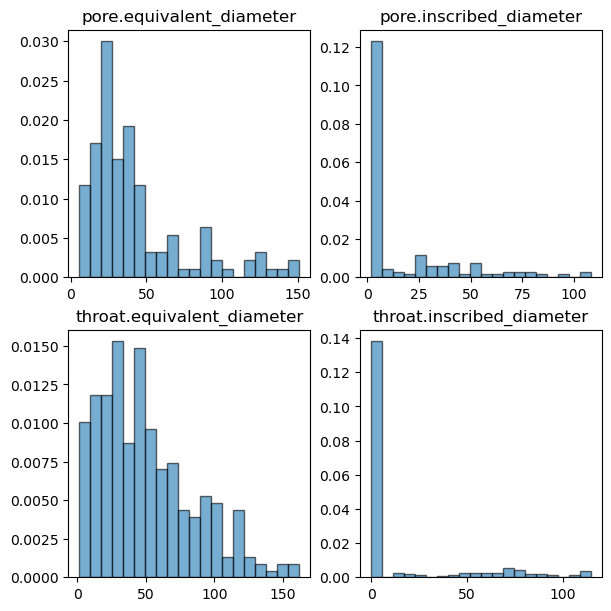

In [11]:
pn = schiller_lab_tools.microstructure_analysis.get_pn(phi_fill, parallel = {'cores':1, 'divs':[1, 1, 1], 'overlap':8})

fig, axs = plt.subplots(2,2, figsize = (6, 6), layout = "constrained")
a = 0.6
b = 20

ax = axs[0, 0]
parameter = 'pore.equivalent_diameter' 
ax.hist(pn[parameter], alpha = a, bins = b, density = True, edgecolor = "k")
ax.set_title(parameter)

ax = axs[0, 1]
parameter = 'pore.inscribed_diameter' 
ax.hist(pn[parameter], alpha = a, bins = b, density = True, edgecolor = "k")
ax.set_title(parameter)

ax = axs[1, 0]
parameter = 'throat.equivalent_diameter' 
ax.hist(pn[parameter], alpha = a, bins = b, density = True, edgecolor = "k")
ax.set_title(parameter)

ax = axs[1, 1]
parameter = 'throat.inscribed_diameter' 
ax.hist(pn[parameter], alpha = a, bins = b, density = True, edgecolor = "k")
ax.set_title(parameter)

In [12]:
filter_func = lambda x: np.where(x > 0, 1, 0)
tau_s = schiller_lab_tools.microstructure_analysis.taufactor_tortuosity(phi_fill, filter = filter_func)

/usa/nkarthi/.conda/envs/nkarthiEnv/lib/python3.9/site-packages/taufactor/taufactor.py:39: UserWarning: CUDA not available, defaulting device to cpu. To avoid this warning, explicitly set the device when initialising the solver with device=torch.device('cpu')
  warnings.warn(


converged to: 1.8690015077590942                   after: 1051 iterations in: 101.9423                    seconds at a rate of 0.097 s/iter
converged to: 1.4187036752700806                   after: 751 iterations in: 73.1312                    seconds at a rate of 0.0974 s/iter
converged to: 1.3873529434204102                   after: 801 iterations in: 78.1249                    seconds at a rate of 0.0975 s/iter


# Particle Analysis

In [3]:
positions = md[['x', 'y', 'z']].to_numpy()
orientations = md[['o_x', 'o_y', 'o_z']].to_numpy()
theta, not_in_interface = schiller_lab_tools.particle_analysis.calculate_average_cos_interface_normal(phi_fill, positions, orientations, step_size = 2)

fig, ax = plt.subplots(1, 1, figsize = (4, 4))
a = 0.6
b = 20
bins, counts, patch = ax.hist(theta, alpha = a, bins = b, edgecolor = "k", density = True)
ax.set_title("Angle to interface normal")

NameError: name 'phi_fill' is not defined

In [ ]:
orientations = md[['o_z', 'o_y', 'o_x']].to_numpy()
S = schiller_lab_tools.particle_analysis.calculate_nematic_order(orientations, director = [0, 0, 1])

Text(0.5, 1.0, 'RDF')

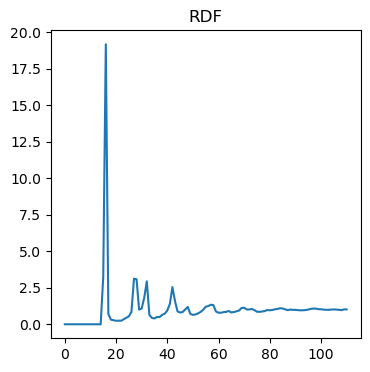

In [15]:
positions = md[['x', 'y', 'z']].to_numpy()
r, gr = schiller_lab_tools.particle_analysis.calculate_rdf(boxDims, positions)

fig, ax = plt.subplots(1, 1, figsize = (4, 4))
ax.plot(r, gr, ls = "-", marker = "None", markerfacecolor = "None")
ax.set_title("RDF")

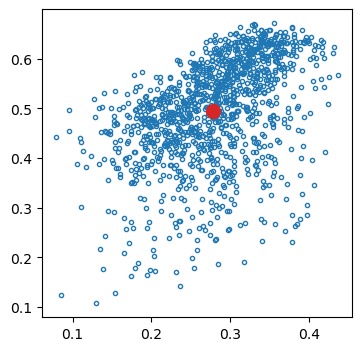

In [16]:
positions = md[['x', 'y', 'z']].to_numpy()
Q4 = schiller_lab_tools.particle_analysis.calculate_minkowski_q(boxDims, positions, L = 4)
Q6 = schiller_lab_tools.particle_analysis.calculate_minkowski_q(boxDims, positions, L = 6)

test = np.array([Q4, Q6])
test = test.T
# test = whiten(test)

clusters = 1
centers, mean_dist = kmeans(test, k_or_guess = clusters)

fig, ax = plt.subplots(1, 1, figsize = (4, 4))

ax.plot(test[:, 0], test[:, 1], ls = "None", marker = ".", markerfacecolor = "None", color = "tab:blue")
# ax.scatter(test[:, 0], test[:, 1])
for i in range(clusters):
    ax.plot(centers[i,0], centers[i, 1], color = "tab:red", marker = "o", ms = 10)

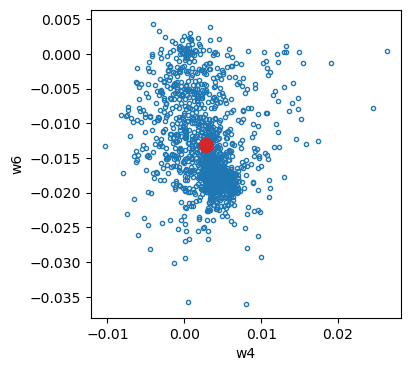

In [17]:
positions = md[['x', 'y', 'z']].to_numpy()
w4 = schiller_lab_tools.particle_analysis.calculate_minkowski_w(boxDims, positions, L = 4)
w6 = schiller_lab_tools.particle_analysis.calculate_minkowski_w(boxDims, positions, L = 6)

test = np.array([w4, w6])
test = test.T
# test = whiten(test)

clusters = 1
centers, mean_dist = kmeans(test, k_or_guess = clusters)

fig, ax = plt.subplots(1, 1, figsize = (4, 4))
ax.plot(test[:, 0], test[:, 1], ls = "None", marker = ".", markerfacecolor = "None")
ax.set_xlabel("w4")
ax.set_ylabel("w6")

for i in range(clusters):
    ax.plot(centers[i,0], centers[i, 1], color = "tab:red", marker = "o", ms = 10)